#**IMPORTING THE DEPENDENCIES**

In [1]:
# IMPORTING THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.ticker as mtick
from prettytable import PrettyTable
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder

#**LOADING THE DATASET**

In [2]:
# LOADING THE TRAIN AND TEST FILES
train = pd.read_csv('/content/drive/MyDrive/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Test.csv')

In [3]:
# LET'S MERGE OUR DATASET
train['data']='train'
test['data']='test'
df = pd.concat([train,test],axis=0)

#**LET'S HAVE A LOOK AT THE DATASET**

In [4]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit,data
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit,train
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit,train
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit,train
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit,train
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit,train


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 89785
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              299285 non-null  object 
 1   age                             299285 non-null  int64  
 2   gender                          299285 non-null  object 
 3   education                       299285 non-null  object 
 4   class                           148961 non-null  object 
 5   education_institute             18918 non-null   object 
 6   marital_status                  299285 non-null  object 
 7   race                            299285 non-null  object 
 8   is_hispanic                     299285 non-null  object 
 9   employment_commitment           299285 non-null  object 
 10  unemployment_reason             9200 non-null    object 
 11  employment_stat                 299285 non-null  int64  
 12  wage_per_hour    

In [6]:
df.shape

(299285, 44)

In [7]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit', 'data'],
      dtype='object')

In [8]:
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             150324
education_institute               280367
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               290085
employment_stat                        0
wage_per_hour                          0
is_labor_union                    270742
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              150967
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   216626
veterans_admin_questionnaire      296274
vet_benefit     

#**COUNT PLOT**

<Axes: xlabel='income_above_limit', ylabel='count'>

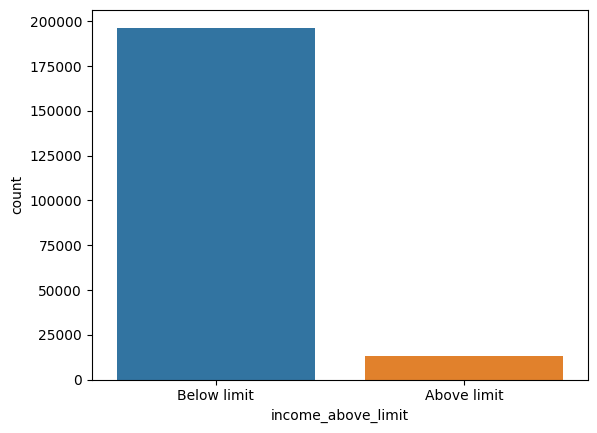

In [9]:
# PLOTTING THE COUNT PLOT TO SEE THE DISTRIBUTION OF TARGET VARIABLE
sns.countplot(data=train, x="income_above_limit", palette='tab10')

In [10]:
# LET'S SEE THE COUNT OF OUR TARGET DISTRIBUTION
train['income_above_limit'].value_counts()

Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64

##**LET'S UNDERSTAND THE MISSING VALUES OF OUR DATASET**

In [11]:
# LETS WRITE A FUNCTION TO UNDERSTAND THE MISSING VALUES OF OUR DATASET
def missing_value_info(df):
    null_info_df=pd.DataFrame({'column':df.isnull().sum().index,'count':df.isnull().sum().values}).query('count > 0').\
    assign(missing_percentage=lambda x: round((x['count']/len(df))*100,3 )).sort_values('missing_percentage',ascending=False)
    _=plt.figure(figsize=(15,6));
    df_plot=sns.barplot(data=null_info_df,x='missing_percentage',y='column',color='green')
    _=plt.yticks(fontsize=15);
    _=plt.xticks(fontsize=15);
    _=plt.title("Missing Value Percentage by Column \n",fontsize=20)
    df_plot.xaxis.set_major_formatter(mtick.PercentFormatter())
    return  print(f"Columns with More than 70% of Missing Data: {null_info_df[null_info_df['missing_percentage']>70]['column'].values}\n\n"),display(null_info_df)

Columns with More than 70% of Missing Data: ['veterans_admin_questionnaire' 'unemployment_reason'
 'education_institute' 'old_residence_reg' 'old_residence_state'
 'is_labor_union' 'under_18_family']




,column,count,missing_percentage
23,veterans_admin_questionnaire,207415,99.005
10,unemployment_reason,202979,96.888
5,education_institute,196197,93.651
39,old_residence_reg,193148,92.195
40,old_residence_state,193148,92.195
13,is_labor_union,189420,90.416
22,under_18_family,151654,72.389
38,residence_1_year_ago,106284,50.732
18,occupation_code_main,105694,50.451
4,class,105245,50.237


(None, None)

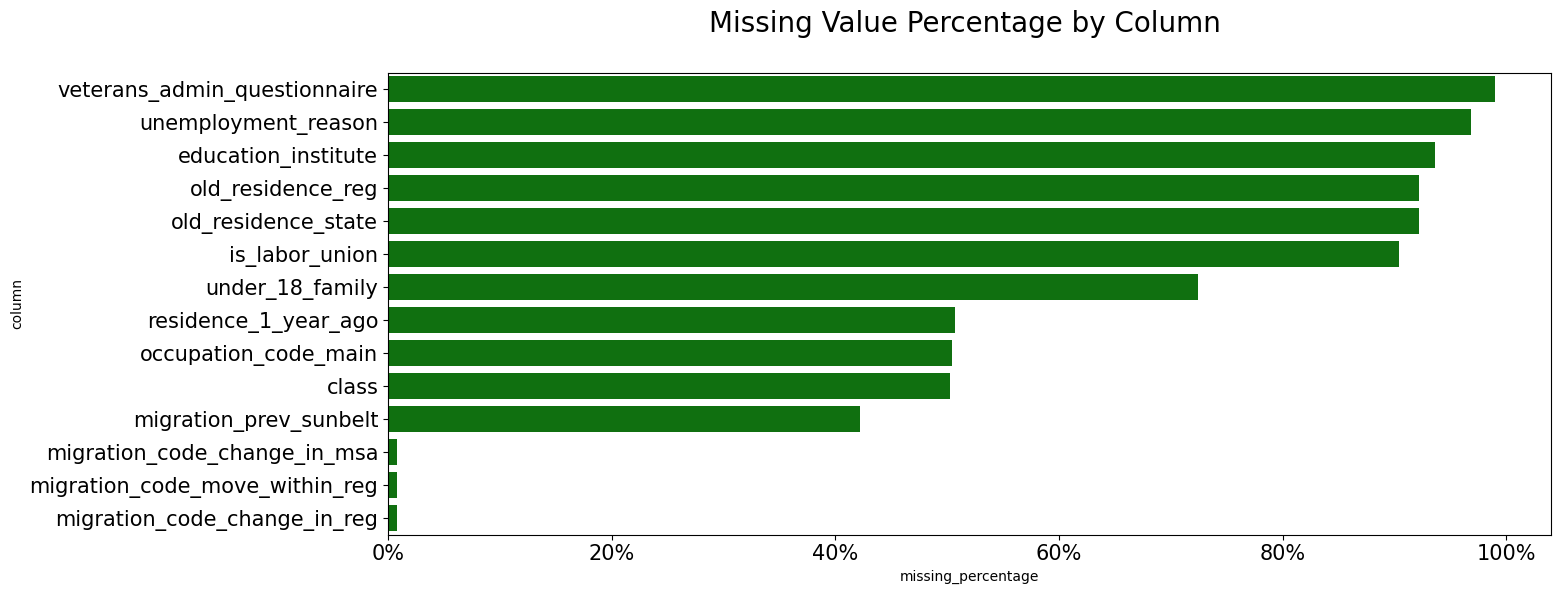

In [12]:
# PRINTING THE COLUMNS WHICH HAS MORE THAN 70% MISSING VALUES.
missing_value_info(train)

#**KDE PLOT**

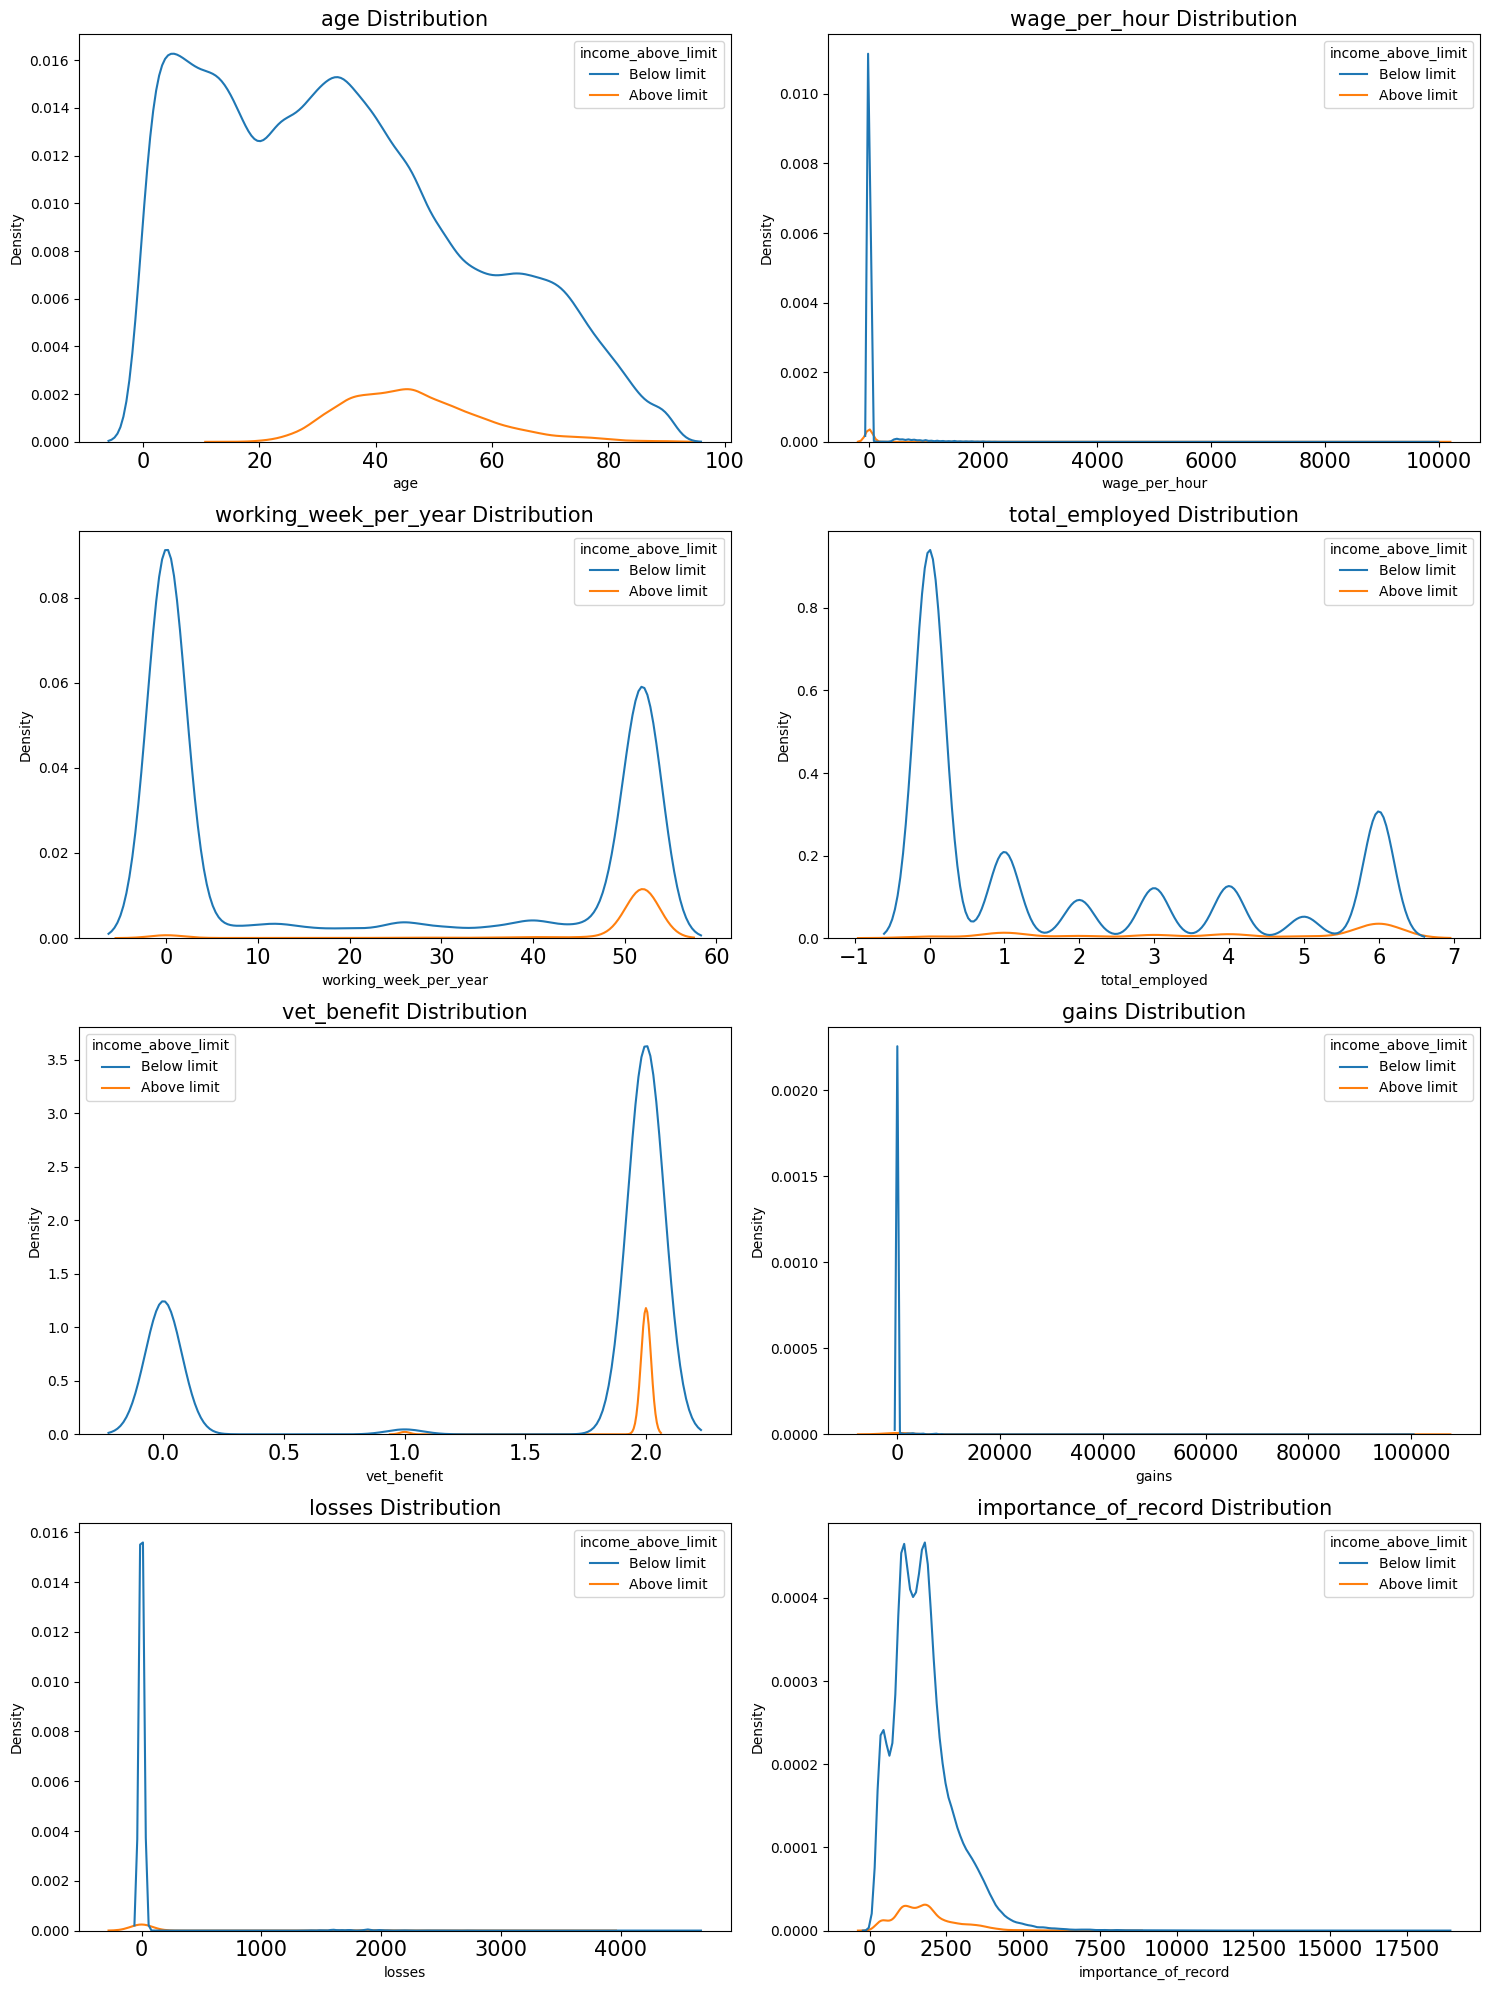

In [13]:
# PLOTTING THE KDE PLOT TO UNDERSTAND THE TARGET DISTRIBUTION AS PER EACH COLUMN
fig=plt.subplots(figsize=(15, 20))
for i,col  in enumerate( ['age',  'wage_per_hour', 'working_week_per_year',
        'total_employed', 'vet_benefit',
       'gains', 'losses',  'importance_of_record']):
    _=plt.subplot(4,2,i+1)
    _=sns.kdeplot(x=train[col],hue=train['income_above_limit'])
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.xlabel(col,fontsize=10)
    _=plt.xticks(fontsize=15)
    _=plt.tight_layout()
plt.show()

#**SUMMARY OF KDE PLOT**

In [14]:
# LET'S SEE THE SUMMARY OF KDE PLOT
kde_plot_summary = PrettyTable([i.capitalize() for i in['name','skew','kurtosis','mean','median','mean>median']])
kde_plot_summary.align['Name']="l"
for field in ['skew','kurtosis','mean','median']:
    kde_plot_summary.align[field]="r"



for num, col  in enumerate(['age',  'wage_per_hour', 'working_week_per_year',
        'total_employed', 'vet_benefit',
       'gains', 'losses',  'importance_of_record']):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")
    d.append(round(skew(train[col], axis=0, bias=True),3))
    d.append(round(kurtosis(train[col], axis=0, bias=True),3))
    d.append(round(train[col].describe()[1],3))
    d.append(round(train[col].describe()[6],3))
    d.append(train[col].describe()[1]>train[col].describe()[6])
    kde_plot_summary.add_row(d)

kde_plot_summary


Name,Skew,Kurtosis,Mean,Median,Mean>median
1.Age,0.371,-0.736,34.519,50.0,False
2.Wage_per_hour,9.222,166.169,55.433,0.0,True
3.Working_week_per_year,0.212,-1.862,23.159,52.0,False
4.Total_employed,0.753,-1.079,1.956,4.0,False
5.Vet_benefit,-1.204,-0.531,1.516,2.0,False
6.Gains,18.982,392.946,435.927,0.0,True
7.Losses,7.7,62.966,36.882,0.0,True
8.Importance_of_record,1.465,5.853,1740.888,2185.48,False


#**BOX PLOT**

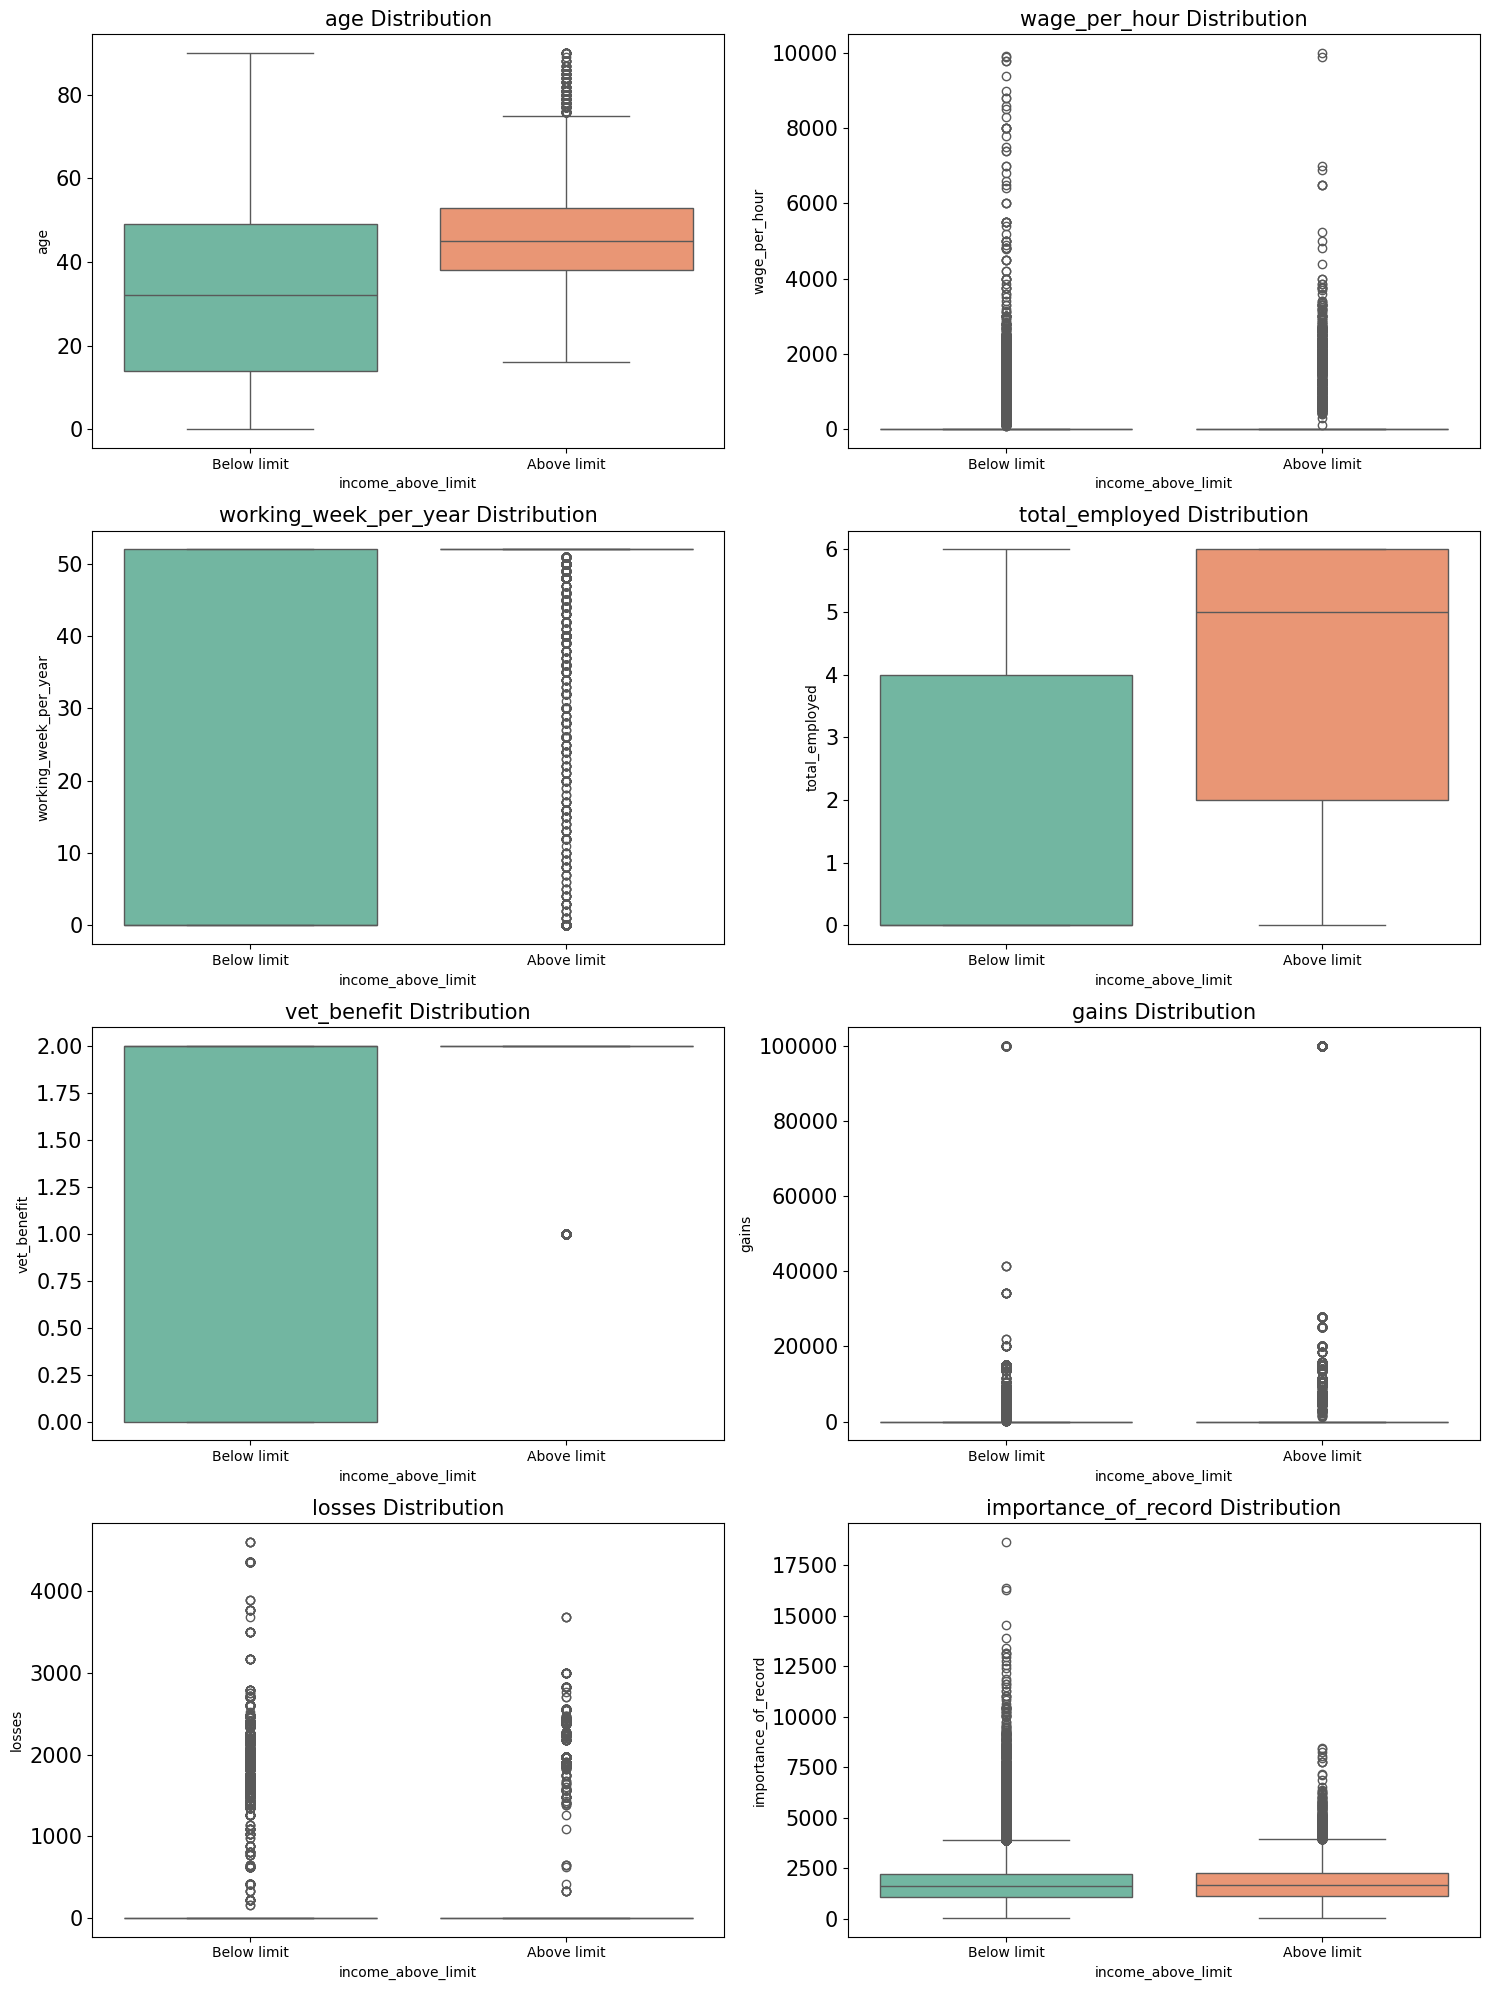

In [15]:
# LET'S PLOT A BOX PLOT TO HAVE A LOOK AT THE OUTLIERS
fig=plt.subplots(figsize=(15, 20))
for i,col  in enumerate( ['age',  'wage_per_hour', 'working_week_per_year',
        'total_employed', 'vet_benefit',
       'gains', 'losses',  'importance_of_record']):
    _=plt.subplot(4,2,i+1)
    _=sns.boxplot(x=train['income_above_limit'],y=train[col], palette='Set2')
    _=plt.title(col+' Distribution',fontsize=15)
    _=plt.ylabel(col,fontsize=10)
    _=plt.yticks(fontsize=15)
    _=plt.tight_layout()
plt.show()

#**SUMMARY OF BOX PLOT**

In [16]:
# LET'S UNDERSTAND THE SUMMARY OF OUR BOX PLOT
box_plot_summary = PrettyTable([i.capitalize() for i in['name', 'min', 'Q1-25%', 'Q2(Median)50%', 'Q3-75%', 'max','iqr','lower limit','upper limit','outlier']])
box_plot_summary.align["Name"] = "l"

for num, col  in enumerate(['age',  'wage_per_hour', 'working_week_per_year',
        'total_employed', 'vet_benefit',
       'gains', 'losses',  'importance_of_record']):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")
    d.append(round(train[col].describe()[3],3))
    d.append(round(train[col].describe()[4],3))
    d.append(round(train[col].describe()[5],3))
    d.append(round(train[col].describe()[6],3))
    d.append(round(train[col].describe()[7],3))
    d.append(round(train[col].describe()[6]-train[col].describe()[4],3))
    low_limit=round(train[col].describe()[4]-1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    up_limit=round(train[col].describe()[6]+1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    d.append(low_limit)
    d.append(low_limit)
    d.append(any([(any(i < low_limit for i in train[col].values)), (any(i > up_limit for i in train[col].values))]))

    box_plot_summary.add_row(d)
box_plot_summary


Name,Min,Q1-25%,Q2(median)50%,Q3-75%,Max,Iqr,Lower limit,Upper limit,Outlier
1.Age,0.0,15.0,33.0,50.0,90.0,35.0,-37.5,-37.5,False
2.Wage_per_hour,0.0,0.0,0.0,0.0,9999.0,0.0,0.0,0.0,True
3.Working_week_per_year,0.0,0.0,8.0,52.0,52.0,52.0,-78.0,-78.0,False
4.Total_employed,0.0,0.0,1.0,4.0,6.0,4.0,-6.0,-6.0,False
5.Vet_benefit,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,True
6.Gains,0.0,0.0,0.0,0.0,99999.0,0.0,0.0,0.0,True
7.Losses,0.0,0.0,0.0,0.0,4608.0,0.0,0.0,0.0,True
8.Importance_of_record,37.87,1061.29,1617.04,2185.48,18656.3,1124.19,-624.995,-624.995,True


#**DATA PRE-PROCESSING**

In [17]:
# DROPPING THE COLUMNS
df1 = df.drop(columns=['ID', 'class', 'education_institute', 'is_hispanic', 'unemployment_reason', 'is_labor_union',
                      'occupation_code_main', 'household_stat', 'under_18_family', 'veterans_admin_questionnaire',
                      'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa',
                      'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg',
                      'residence_1_year_ago', 'old_residence_reg', 'old_residence_state'],axis=1)


In [18]:
df1.isnull().sum()

age                          0
gender                       0
education                    0
marital_status               0
race                         0
employment_commitment        0
employment_stat              0
wage_per_hour                0
working_week_per_year        0
industry_code                0
industry_code_main           0
occupation_code              0
total_employed               0
household_summary            0
vet_benefit                  0
tax_status                   0
gains                        0
losses                       0
stocks_status                0
citizenship                  0
mig_year                     0
importance_of_record         0
income_above_limit       89786
data                         0
dtype: int64

###**IMPUTING THE VALUES USING SIMPLE IMPUTER**

In [19]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(strategy='most_frequent')
df1['income_above_limit'] = imp_mode.fit_transform(df1[['income_above_limit']])

In [20]:
df1.isnull().sum()

age                      0
gender                   0
education                0
marital_status           0
race                     0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
industry_code_main       0
occupation_code          0
total_employed           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
income_above_limit       0
data                     0
dtype: int64

##**LABEL ENCODING**

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Identify the columns containing categorical variables
categorical_cols = ['gender', 'education', 'marital_status', 'race', 'employment_commitment', 'industry_code_main', 'household_summary',
                    'tax_status', 'citizenship', 'data', 'income_above_limit']

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode each column
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

# Alternatively, you can use a more concise approach using applymap
# data[categorical_cols] = data[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Display the updated DataFrame
print(df1)


       age  gender  education  marital_status  race  employment_commitment  \
0       79       0         12               6     4                      2   
1       65       0         12               6     4                      0   
2       21       1          2               4     2                      0   
3        2       0         10               4     1                      0   
4       70       1         12               2     4                      2   
...    ...     ...        ...             ...   ...                    ...   
89781    5       1         10               4     4                      0   
89782   81       0          5               2     4                      2   
89783   65       0         12               2     4                      0   
89784   38       0         12               1     4                      1   
89785   23       0         16               4     4                      1   

       employment_stat  wage_per_hour  working_week_per_year  i

In [22]:
df1['income_above_limit'].unique()

array([1, 0])

###**SEPARATING THE TARGET VARIABLE**

In [23]:
X = df1.drop(columns=['income_above_limit'], axis=1)
Y = df1['income_above_limit']

##**TRAIN TEST SPLIT**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#**MODEL BUILDING**

#**DECISION TREE**

In [25]:
# Training the Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [26]:
# Finding the Accuracy score of Training Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
# Finding the Accuracy Score of Testing Data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[ 1248  1384]
 [ 1431 55794]]
f1               precision    recall  f1-score   support

           0       0.47      0.47      0.47      2632
           1       0.98      0.97      0.98     57225

    accuracy                           0.95     59857
   macro avg       0.72      0.72      0.72     59857
weighted avg       0.95      0.95      0.95     59857

Accuracy 0.9529712481414037


In [29]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Training Data :  1.0
Accuracy on Test Data :  0.9529712481414037


#**RANDOM FOREST CLASSIFIER**

In [30]:
# Training the Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [31]:
# Finding the Accuracy score of Training Data
X_train_prediction = random_forest.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
# Finding the Accuracy Score of Testing Data
X_test_prediction = random_forest.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[ 1103  1529]
 [  360 56865]]
f1               precision    recall  f1-score   support

           0       0.75      0.42      0.54      2632
           1       0.97      0.99      0.98     57225

    accuracy                           0.97     59857
   macro avg       0.86      0.71      0.76     59857
weighted avg       0.96      0.97      0.96     59857

Accuracy 0.9684414521275707


In [34]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ' , accuracy_score(Y_test, X_test_prediction))

Accuracy on Training Data :  0.9999832935162136
Accuracy on Test Data :  0.9684414521275707


#**XGBOOST CLASSIFIER**

In [35]:
# Training the Model
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
xgb = xgb.XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
# Finding the Accuracy score of Training Data
X_train_prediction = xgb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
# Finding the Accuracy Score of Testing Data
x_test_prediction = xgb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
# Printing the Confusion Matrix, Classification Report, and Accuray Score
# Printing the Confusion Matrix, Classification Report, and Accuray Score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Matrix', confusion_matrix(Y_test, X_test_prediction))
print('f1', classification_report(Y_test, X_test_prediction))
print('Accuracy', accuracy_score(Y_test, X_test_prediction))

Matrix [[ 1103  1529]
 [  360 56865]]
f1               precision    recall  f1-score   support

           0       0.75      0.42      0.54      2632
           1       0.97      0.99      0.98     57225

    accuracy                           0.97     59857
   macro avg       0.86      0.71      0.76     59857
weighted avg       0.96      0.97      0.96     59857

Accuracy 0.9684414521275707


In [39]:
# Printing the Accuracy of Training Data and Test Data.
print('Accuracy on Training Data : ', training_data_accuracy)
print('Accuracy on Test Data : ' , accuracy_score(Y_test, X_test_prediction))

Accuracy on Training Data :  0.9749193912157308
Accuracy on Test Data :  0.9684414521275707
